In [5]:
#데이터 로드
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


file_path = "./heart.csv"
df = pd.read_csv(file_path)

In [6]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['target'], axis = 1) 
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 타겟 원핫 인코딩
y_train_encoded = to_categorical(y_train)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8689


In [11]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 400}
최고 정확도: 0.8181122448979593
튜닝 후 정확도: 0.8524590163934426


In [64]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[25  4]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[25  4]
 [ 5 27]]


In [12]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6927 - loss: 0.6109 - val_accuracy: 0.8163 - val_loss: 0.5389
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.5114 - val_accuracy: 0.8367 - val_loss: 0.4970
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.4739 - val_accuracy: 0.8571 - val_loss: 0.4744
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.4545 - val_accuracy: 0.8571 - val_loss: 0.4545
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8494 - loss: 0.4235 - val_accuracy: 0.8571 - val_loss: 0.4393
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3893 - val_accuracy: 0.8367 - val_loss: 0.4278
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8457 - loss: 0.3961 - val_accuracy: 0.8571 - val_loss: 0.4232
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3532 - val_accuracy: 0.8367 - val_loss: 0.4169
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9001 - loss: 0.2822 - val_accuracy: 0.8163 - val_loss: 0.4140
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.2544 - val_accuracy: 0.8163 - val_loss: 0.4080
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.2689 - val_accuracy: 0.8163 - val_loss: 0.4079
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2608 - val_accuracy: 0.8163 - val_loss: 0.4068
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8960 - loss: 0.2673 - val_accuracy: 0.8163 - val_loss: 0.4086
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8880 - loss: 0.2561 - val_accuracy: 0.8163 - val_loss: 0.4150
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9176 - loss: 0.2249 - val_accuracy: 0.8163 - val_loss: 0.4203
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.2231 - val_accuracy: 0.8163 - val_loss: 0.4154
Epoch 9/

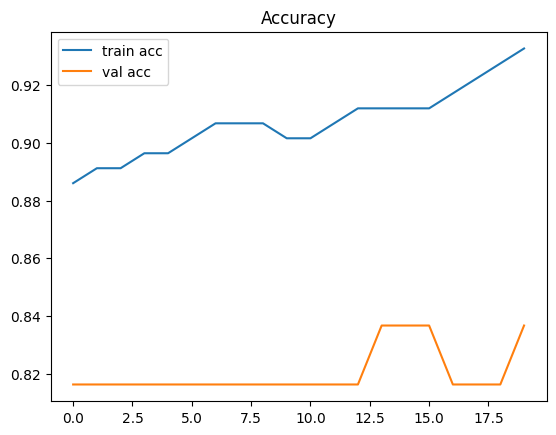

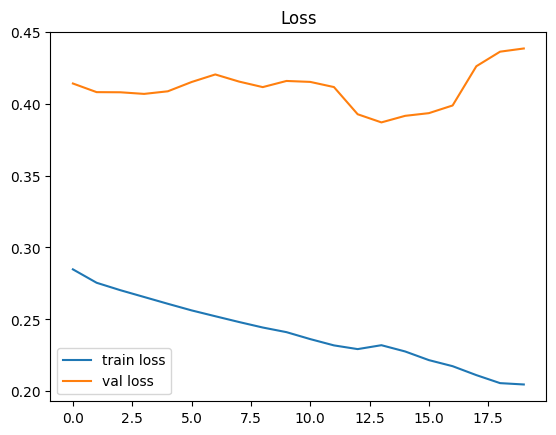

In [14]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

# X_train을 DataFrame으로 유지
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8197


In [16]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(3, 10), 'min_samples_split': randint(2, 10)}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring="accuracy")
random_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 6, 'min_samples_split': 2}
최고 정확도: 0.7645408163265306
튜닝 후 정확도: 0.8524590163934426


In [17]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[23  6]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[24  5]
 [ 4 28]]


In [23]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)
# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5731 - loss: 0.7130 - val_accuracy: 0.6939 - val_loss: 0.6407
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 0.6211 - val_accuracy: 0.7143 - val_loss: 0.5368
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7514 - loss: 0.5402 - val_accuracy: 0.7347 - val_loss: 0.4698
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.4485 - val_accuracy: 0.7551 - val_loss: 0.4348
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4342 - val_accuracy: 0.7959 - val_loss: 0.4186
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4360 - val_accuracy: 0.7959 - val_loss: 0.4142
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.3592 - val_accuracy: 0.7755 - val_loss: 0.4215
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3597 - val_accuracy: 0.7551 - val_loss: 0.4229
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8634 - loss: 0.3129 - val_accuracy: 0.8163 - val_loss: 0.4355
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.2764 - val_accuracy: 0.8163 - val_loss: 0.4402
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2688 - val_accuracy: 0.8163 - val_loss: 0.4410
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9124 - loss: 0.2562 - val_accuracy: 0.7959 - val_loss: 0.4497
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9061 - loss: 0.2674 - val_accuracy: 0.7959 - val_loss: 0.4542
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.2450 - val_accuracy: 0.7959 - val_loss: 0.4601
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.2328 - val_accuracy: 0.8163 - val_loss: 0.4440
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2873 - val_accuracy: 0.8163 - val_loss: 0.4406
Epoch 9/

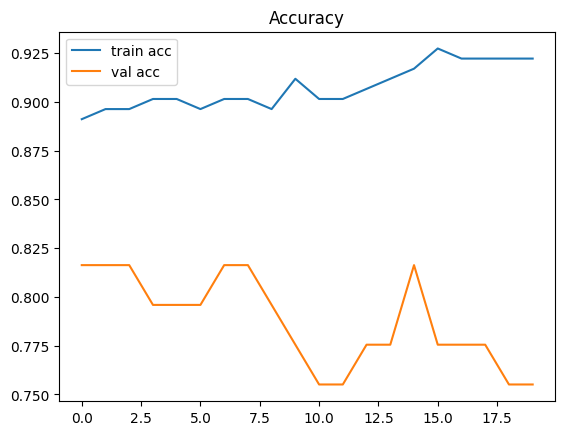

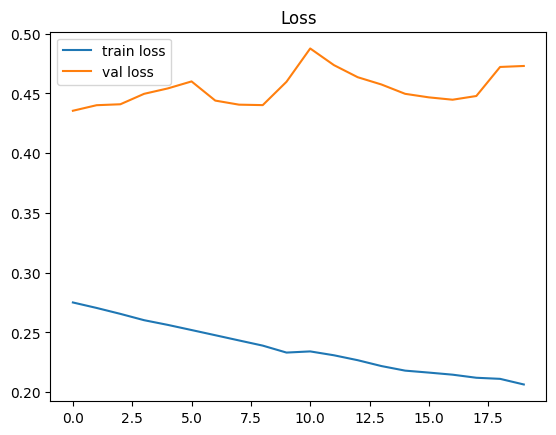

In [26]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC


# SVC 모델 학습
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8689


In [28]:
#하이퍼파라미터 튜닝
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
최고 정확도: 0.8224489795918368
튜닝 후 정확도: 0.8688524590163934


In [29]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[26  3]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[26  3]
 [ 5 27]]


In [30]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)
# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5592 - loss: 0.7222 - val_accuracy: 0.7347 - val_loss: 0.5851
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.6185 - val_accuracy: 0.7755 - val_loss: 0.5366
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.5658 - val_accuracy: 0.7755 - val_loss: 0.5025
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.5347 - val_accuracy: 0.8163 - val_loss: 0.4805
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.4921 - val_accuracy: 0.7959 - val_loss: 0.4568
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4730 - val_accuracy: 0.7959 - val_loss: 0.4362
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.4468 - val_accuracy: 0.7959 - val_loss: 0.4249
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4126 - val_accuracy: 0.7959 - val_loss: 0.4204
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.3447 - val_accuracy: 0.7755 - val_loss: 0.4137
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8789 - loss: 0.3051 - val_accuracy: 0.7755 - val_loss: 0.4079
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.2706 - val_accuracy: 0.7755 - val_loss: 0.4005
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.2923 - val_accuracy: 0.7755 - val_loss: 0.3927
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.2777 - val_accuracy: 0.7959 - val_loss: 0.3866
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8822 - loss: 0.3004 - val_accuracy: 0.7755 - val_loss: 0.3829
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2493 - val_accuracy: 0.7755 - val_loss: 0.3853
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9059 - loss: 0.2540 - val_accuracy: 0.7755 - val_loss: 0.3972
Epoch 9/

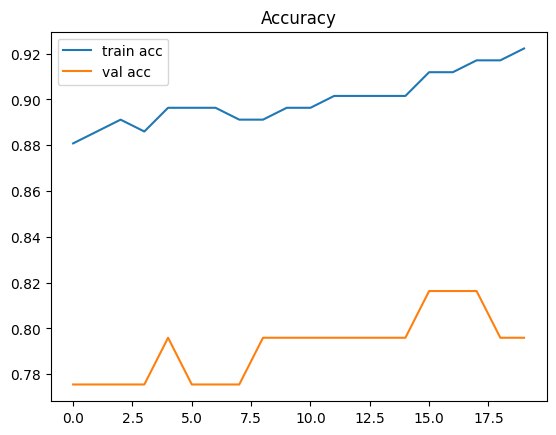

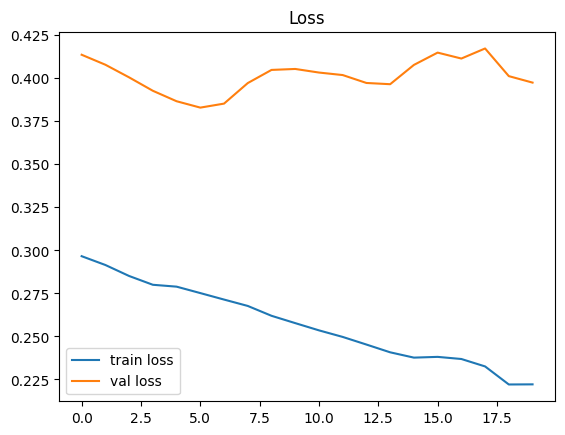

In [32]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 로지스틱 회귀 모델 학습 (max_iter 늘리고, solver 변경)
model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8525


In [34]:
# 하이퍼파라미터 튜닝: 'solver'와 'penalty' 조건을 맞추기 위해 필터링
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']}, {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}]

# GridSearchCV로 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             scoring='accuracy')

In [35]:
#하이퍼 파라미터 튜닝 후 정확도
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
최고 정확도: 0.8221088435374149
튜닝 후 정확도: 0.8524590163934426


In [36]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[25  4]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[25  4]
 [ 5 27]]


In [37]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5516 - loss: 0.7158 - val_accuracy: 0.7551 - val_loss: 0.5883
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.6183 - val_accuracy: 0.7347 - val_loss: 0.5196
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7214 - loss: 0.5419 - val_accuracy: 0.7551 - val_loss: 0.4726
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.4737 - val_accuracy: 0.7143 - val_loss: 0.4410
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.4865 - val_accuracy: 0.7143 - val_loss: 0.4226
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.4025 - val_accuracy: 0.7143 - val_loss: 0.4110
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.4102 - val_accuracy: 0.7755 - val_loss: 0.3958
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8236 - loss: 0.3747 - val_accuracy: 0.7755 - val_loss: 0.3891
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8946 - loss: 0.2637 - val_accuracy: 0.7551 - val_loss: 0.3914
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8844 - loss: 0.2940 - val_accuracy: 0.7551 - val_loss: 0.3912
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9176 - loss: 0.2293 - val_accuracy: 0.7551 - val_loss: 0.3916
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9172 - loss: 0.2217 - val_accuracy: 0.7551 - val_loss: 0.3895
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8880 - loss: 0.2443 - val_accuracy: 0.7959 - val_loss: 0.3822
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9021 - loss: 0.2518 - val_accuracy: 0.8163 - val_loss: 0.3788
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.2559 - val_accuracy: 0.7755 - val_loss: 0.3827
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9125 - loss: 0.2199 - val_accuracy: 0.7551 - val_loss: 0.3905
Epoch 9/

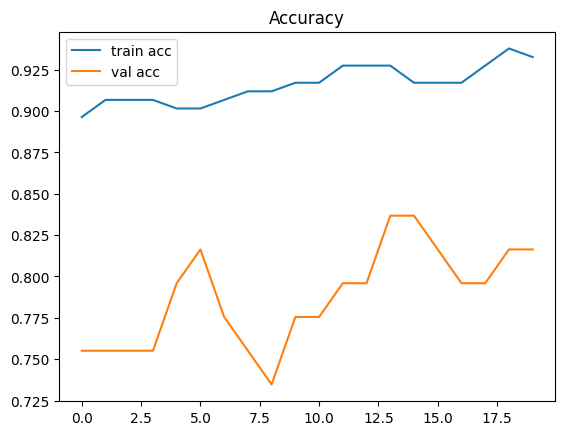

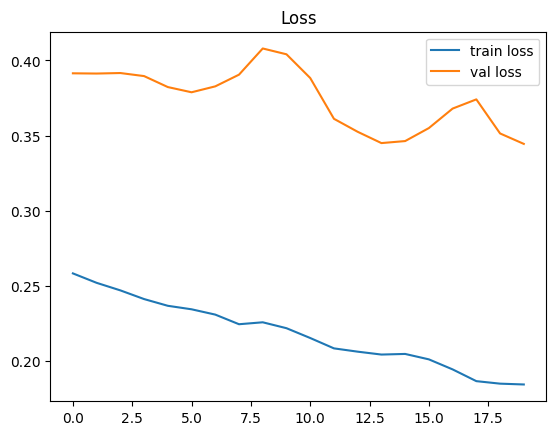

In [40]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()